<a href="https://colab.research.google.com/github/Arindomisi/CMI-Work/blob/main/Cat_vs_Dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.04G/1.06G [00:09<00:00, 228MB/s]
100% 1.06G/1.06G [00:09<00:00, 125MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
! pip install Keras

In [5]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

In [6]:
# genetarors
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',\
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',\
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
  image = tf.cast(image/255. ,tf.float32)
  return image,label

  train_ds = train_ds.map(process)
  validation_ds = validation_ds.map(process)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [9]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [10]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 2837s 5s/step - loss: 3.8689 - accuracy: 0.5620 - val_loss: 0.6679 - val_accuracy: 0.5898
Epoch 2/10
625/625 [==============================] - 2833s 5s/step - loss: 0.6880 - accuracy: 0.5997 - val_loss: 0.6798 - val_accuracy: 0.5740
Epoch 3/10
625/625 [==============================] - 2795s 4s/step - loss: 0.6301 - accuracy: 0.6353 - val_loss: 0.7025 - val_accuracy: 0.5894
Epoch 4/10
625/625 [==============================] - 3083s 5s/step - loss: 0.5357 - accuracy: 0.7187 - val_loss: 0.7700 - val_accuracy: 0.5912
Epoch 5/10
625/625 [==============================] - 3187s 5s/step - loss: 0.4440 - accuracy: 0.7868 - val_loss: 0.9168 - val_accuracy: 0.5976
Epoch 6/10
625/625 [==============================] - 3183s 5s/step - loss: 0.3323 - accuracy: 0.8468 - val_loss: 1.0477 - val_accuracy: 0.6042
Epoch 7/10
625/625 [==============================] - 3123s 5s/step - loss: 0.2451 - accuracy: 0.8947 - val_loss: 1.3874 - val_accuracy:

In [12]:
import matplotlib.pyplot as plt


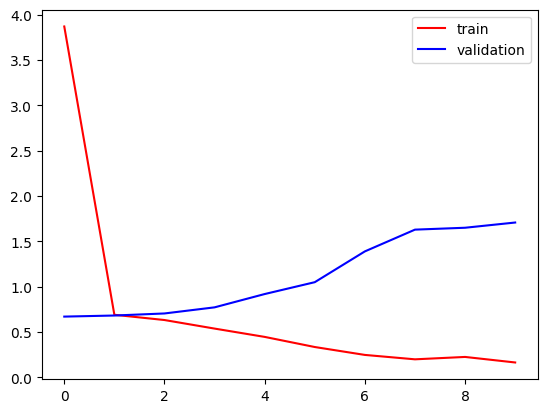

In [13]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'legends'

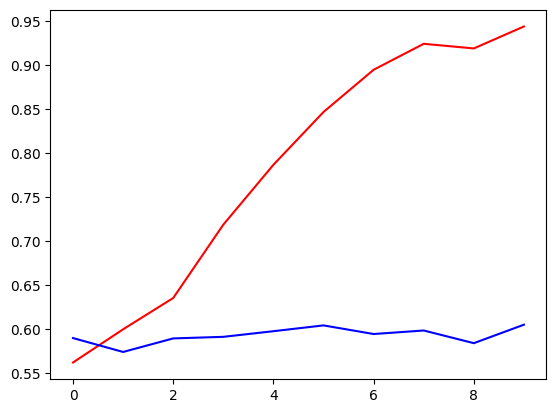

In [14]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legends()
plt.show()

In [15]:
# ways to reduce overfittings

# Add more data
# Data Augmentation -> next video
# L1/L2 Regularizer
# Dropout
# Batch Norm
# Reduce Complexity

In [16]:
import cv2

In [29]:
test_img = cv2.imread('/content/dog.jpg')

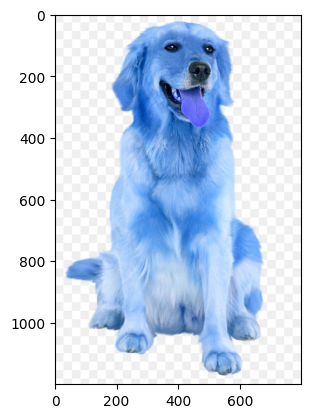

In [30]:
plt.imshow(test_img)

In [25]:
test_img.shape

(360, 543, 3)

In [26]:
test_img = cv2.resize(test_img,(256,256))

In [27]:
test_input = test_img.reshape((1,256,256,3))

In [28]:
model.predict(test_input)

1/1 [==============================] - 0s 58ms/step


array([[0.5075536]], dtype=float32)